### Análise de Variância

- Comparação entre 3 ou mais grupos (amostras independentes)
- Uma variável quantitativa e uma ou mais variáveis qualitativas
- Distribuição Normal (estatística paramétrica)
- Variação entre os grupos comparando a variação dentro dos grupos
- H0: não existe diferença estatística
- H1: existe diferença estatística

#### Passo a passo
- Calcula a média de cada grupo
- Calcula a média geral
- Calcula o quadrado da diferença entre a média do grupo e média geral
- Soma os resultados do passo anterior e multiplica pelo número de linhas (SSG - sum of squares group)
- Calcula os graus de liberdade do grupo, número de grupos - 1 (DFG - degress of freedom groups)
- Calcula o quadrado da diferença de cada valor com a média do respectivo grupo que o valor faz parte
- Soma os resultados (SSE - sum of squares error)
- Multiplica a (quantidade de linhas - 1) * grupos (DFE
- Calcula a estatística F = (SSG/DFG)/(SSE/DFE)
- Calcula o F crítico, consulta a tabela F, há uma tabela para cada alpha, usa os graus de liberdade DFG e DFE para consultar a tabela
- Decisão:  
    - F caculado <= F crítico, aceita hipótese nula
    - F calculado > F crítico, rejeita hipótese nula

### Exemplo prático

In [3]:
from scipy.stats import f
import numpy as np

In [4]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [5]:
f.ppf(1 - 0.05, dfn = 2, dfd = 12)

3.8852938346523933

In [6]:
from scipy.stats import f_oneway

In [7]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

0.7613994386091956

In [8]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

Hipótese alternativa rejeitada


### Teste de Tukey

In [9]:
# Dados que produzem resultado que rejeita a hipótese alternativa
dados = {'valores': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [10]:
# Dados que produzem resultado que rejeita a hipótese nula
dados = {'valores': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [11]:
import pandas as pd
dados_pd = pd.DataFrame(dados)
dados_pd

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [12]:
from statsmodels.stats.multicomp import MultiComparison

In [13]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupo'])

In [14]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B     90.0 0.001  58.494 121.506   True
     A      C     94.0 0.001  62.494 125.506   True
     B      C      4.0   0.9 -27.506  35.506  False
---------------------------------------------------


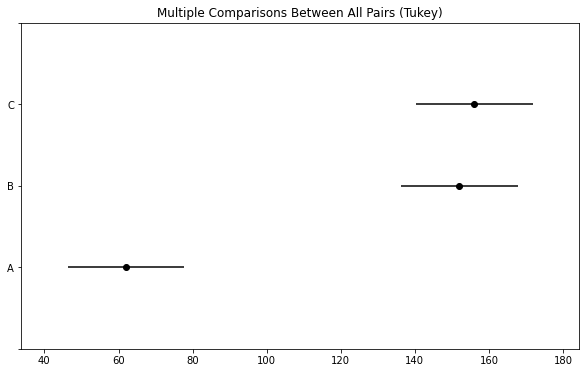

In [16]:
# Mostra como as médias estão próximas, ou distantes
teste.plot_simultaneous();

### Verificar se há diferença estatística entre os algoritmos

In [7]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('datasets/credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [8]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

In [9]:
min(X[0]), max(X[0])

(59.0170150669292, 66155.9250950813)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
min(X[0]), max(X[0])

(1.2019070702053862, 1.4538977547824534)

In [12]:
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv = kfold)
    resultados_naive_cv.append(scores.mean())

    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv = kfold)
    resultados_logistica_cv.append(scores.mean())  

    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

In [13]:
resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249859296482411, 0.9457008375209381, 0.9870475711892795)

### Teste de hipótese de Shapiro-Wilk

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

> O algoritmo random forest tem apresentado o melhor desempenho, vamos avaliar se há diferença significativa entre os três algotimos. Porém precisamos verificar se os dados estão normalmente distribuídos com o teste de hipótese de Shapiro-Wilk.

In [14]:
alpha = 0.05

In [15]:
from scipy.stats import shapiro
shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv)

(ShapiroResult(statistic=0.9646671414375305, pvalue=0.4051830470561981),
 ShapiroResult(statistic=0.9463143944740295, pvalue=0.13459184765815735),
 ShapiroResult(statistic=0.9525711536407471, pvalue=0.19801656901836395))

> O resultado mostra o pvalue > alpha então aceita hipótese nula do teste que significa que os dados estão normalmente distribuídos, se o pvalue < alpha, então aceitaria a hipótese alternativa, ou seja, os dados não são normalmente distruibuídos

- Vamos analisar os gráficos para verificar se assemelham à distribuição normal

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

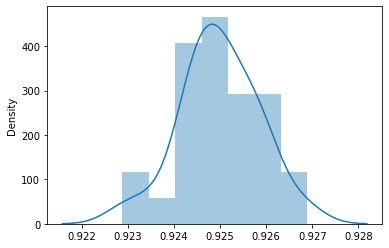

In [16]:
import seaborn as sns
sns.distplot(resultados_naive_cv)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

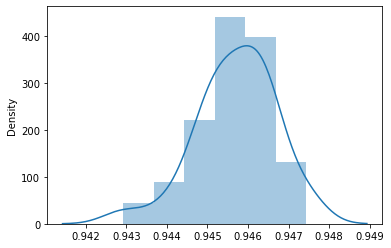

In [17]:
sns.distplot(resultados_logistica_cv)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


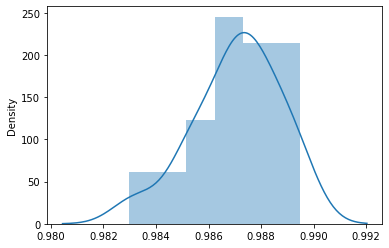

In [18]:
sns.distplot(resultados_forest_cv);

### Teste de hipótese de D'Agostinho K^2

https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test

In [19]:
from scipy.stats import normaltest
normaltest(resultados_naive_cv), normaltest(resultados_logistica_cv), normaltest(resultados_forest_cv)

(NormaltestResult(statistic=0.8391668731677201, pvalue=0.6573205784978502),
 NormaltestResult(statistic=4.079254883823804, pvalue=0.1300771631514313),
 NormaltestResult(statistic=2.3048206890510743, pvalue=0.3158744847287711))

> Não é possível rejeitar a hipótese nula

### Teste de hipótese de Anderson-Darling

In [20]:
from scipy.stats import anderson
anderson(resultados_naive_cv).statistic, anderson(resultados_logistica_cv).statistic, anderson(resultados_forest_cv).statistic

(0.5456346672421084, 0.6048933015735969, 0.41696756915214195)

> Não é possível rejeitar a hipótese nula

### Testes não paramétricos

https://www.statisticshowto.com/parametric-and-non-parametric-data/#:~:text=Nonparametric%20tests%20can%20perform%20well,20%20items%20in%20each%20group).

If at all possible, you should us parametric tests, as they tend to be more accurate. Parametric tests have greater statistical power, which means they are likely to find a true significant effect. Use nonparametric tests only if you have to (i.e. you know that assumptions like normality are being violated). Nonparametric tests can perform well with non-normal continuous data if you have a sufficiently large sample size (generally 15-20 items in each group).

#### Teste de Wilcoxon Signed-Rank

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

In [21]:
from scipy.stats import wilcoxon
_, p = wilcoxon(resultados_naive_cv, resultados_logistica_cv)
p

1.7333066441991056e-06

> p < alpha: rejeitamos a hipótese nula que diz que não há diferença. Aceitamos a hipótese alternativa.

In [22]:
_, p = wilcoxon(resultados_naive_cv, resultados_forest_cv)
p

1.7311263949197288e-06

> p < alpha: rejeitamos a hipótese nula que diz que não há diferença. Aceitamos a hipótese alternativa.

In [23]:
_, p = wilcoxon(resultados_logistica_cv, resultados_forest_cv)
p

1.7333066441991056e-06

> p < alpha: rejeitamos a hipótese nula que diz que não há diferença. Aceitamos a hipótese alternativa.

> dessa forma podemos concluir que o Random Forest é superior ao Naive Bayes e Regrassão Logística pois apresentou a média melhor

### Teste de Friedman

https://en.wikipedia.org/wiki/Friedman_test

O teste de Friedman tem como vantagem receber mais de uma base de dados para realizar as comparações, porém retorna um valor que indica que há diferença significativa, porém não indica quais comparações apontam diferença.

Teste de Nemenyi: https://en.wikipedia.org/wiki/Nemenyi_test

In [30]:
from scipy.stats import friedmanchisquare

In [31]:
_, p = friedmanchisquare(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)
p

9.357622968840163e-14

### ANOVA e Tukey - algoritmos

In [24]:
from scipy.stats import f_oneway

In [25]:
_, p = f_oneway(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)
p

1.2184713732197273e-116

In [26]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Dados são diferentes


In [27]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv]),
                         'algoritmo': ['naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest']}

In [28]:
import pandas as pd
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.924862,naive
1,0.924917,naive
2,0.924387,naive
3,0.922882,naive
4,0.924872,naive
...,...,...
85,0.987490,forest
86,0.986977,forest
87,0.987980,forest
88,0.989492,forest


In [32]:
from statsmodels.stats.multicomp import MultiComparison

In [33]:
compara_grupos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [34]:
teste = compara_grupos.tukeyhsd()
print(teste)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
  forest logistic  -0.0413 0.001 -0.0421 -0.0406   True
  forest    naive  -0.0621 0.001 -0.0628 -0.0613   True
logistic    naive  -0.0207 0.001 -0.0215   -0.02   True
-------------------------------------------------------


> Todas comparações apontam diferenças significativas. Podemos concluir que o Random Forest é que apresentou melhor média.

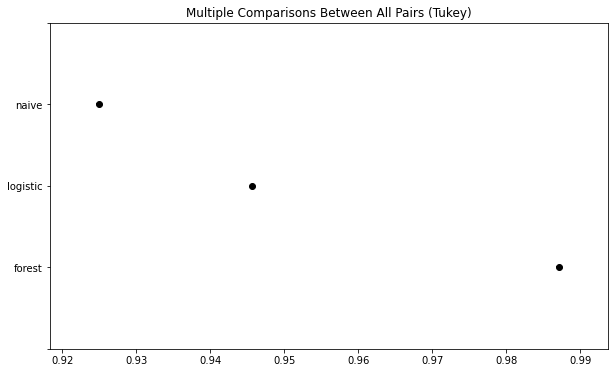

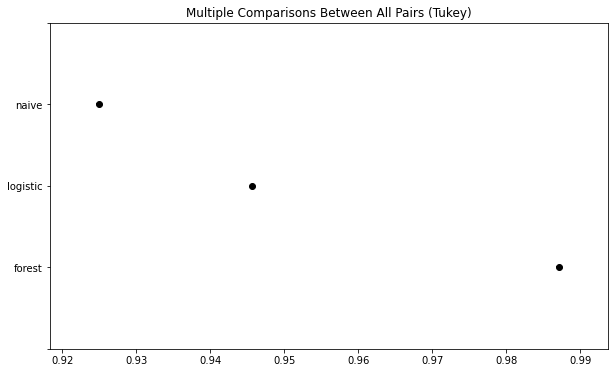

In [35]:
teste.plot_simultaneous()

### Geração do arquivo com os resultados para o teste de Nemenyi

In [36]:
resultados_algoritmos = {'naive_bayes': resultados_naive_cv,
                         'logistica': resultados_logistica_cv,
                         'random_forest': resultados_forest_cv}

In [37]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,naive_bayes,logistica,random_forest
0,0.924862,0.946427,0.983472
1,0.924917,0.946402,0.984980
2,0.924387,0.946417,0.984980
3,0.922882,0.944910,0.985470
4,0.924872,0.945915,0.988987
5,0.925889,0.942917,0.986987
6,0.924384,0.944912,0.986475
7,0.924889,0.946902,0.985482
8,0.924872,0.945415,0.985477
9,0.923889,0.943927,0.988485


In [39]:
# Salvando excel para realizar uma análise no excel, rankear cada execução
resultados_df.to_excel('resultados_excel.xlsx', sheet_name='resultados')